In [91]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Load HR-Employee-Attrition.csv dataset and create an ensemble ML model for predicting target variable (Attrition). Report the performance of the model using appropriate metrics.

In [107]:
data = pd.read_csv('HR-Employee-Attrition.csv', header=0)
dataFrame = pd.DataFrame(data)

dataMap = {'Yes':1, 'No':0,
          'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2,
          'Sales':0, 'Research & Development':1, 'Human Resources':2,
          'Other':0, 'Life Sciences':1, 'Marketing':3, 'Technical Degree':4, 'Medical':5,
          'Female':0, 'Male':1,
          'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':3, 'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6, 'Sales Representative':7, 'Research Director':8,
          'Single':0, 'Married':1, 'Divorced':2,
          'Y':0}
dataFrame = dataFrame.applymap(lambda s: dataMap.get(s) if s in dataMap else s)

target = dataFrame["Attrition"]
dataFrame = dataFrame.drop("Attrition", axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(dataFrame, target, test_size=.2, random_state=0)

rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

print(rfc.get_params())

print("Training accuracy of SVM: {}".format(metrics.accuracy_score(yTrain, rfc.predict(xTrain))))
print("Testing accuracy of SVM : {}".format(metrics.accuracy_score(yTest, rfc.predict(xTest))))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 75, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training accuracy of SVM: 1.0
Testing accuracy of SVM : 0.8503401360544217


Have you used any hyperparameter tuning while building the model in Q1? If so then plot your performance metrics for different hyperparmeter values that you have used in Q1.  Hints

---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------

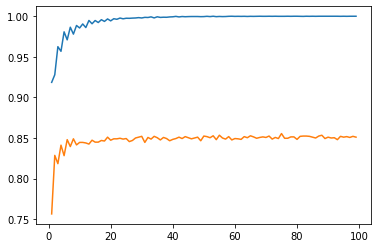

the most best number of classifiers according to accuracy score is 75 with 0.8554421768707483


In [104]:
x = []
y1 = []
y2 = []
print('-'*99)
for i in range(1,100):
    temp1 = 0
    temp2 = 0
    for j in range(10):
        rfc = RandomForestClassifier(n_estimators=i)
        rfc.fit(xTrain, yTrain)
        
        temp1 += metrics.accuracy_score(yTrain, rfc.predict(xTrain))
        temp2 += metrics.accuracy_score(yTest, rfc.predict(xTest))
    
    x.append(i)
    y1.append(temp1/10)
    y2.append(temp2/10)
    print('-', end='')
    
plt.plot(x, y1)
plt.plot(x, y2)
ax.legend(['Train', 'Test'])
plt.show()

bestTest = np.argmax(y2)
bestTrain = np.argmax(y1)

print("the most best number of classifiers according to accuracy score is " + str(x[bestTest]) + " with " + str(y2[bestTest]))

Reflect on the importance of hyperparameter tuning of ML models based on your ML model development exercise. 

hyper parameter tuning is important to get the most accurate training model as it can be used to avoid overfitting or underfitting depending on the exact parameters as both of those results can ruin any chance for the algorithm to be useful